## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = mouse_metadata_df.merge(study_results_df, left_on='Mouse ID', right_on='Mouse ID')

# Display the data table for preview
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
merged_data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
merged_data_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Drop any duplicate rows
merged_data_df.drop_duplicates()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Recheck the number of mice
merged_data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
#Tumor Volume (mm3)	

average = merged_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
med = merged_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = merged_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
stand_dev = merged_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
SEM = merged_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sum()
reg_count = merged_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].count()

d =  {'mean': average, 'median': med, 'variance': variance, 'Standard Deviation': stand_dev, 'Sum': SEM, 'Count': reg_count}
summary_df = pd.DataFrame(data=d)
summary_df

,mean,median,variance,Standard Deviation,Sum,Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,9355.420462,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,9361.228582,178
Infubinol,52.884795,51.820584,43.128684,6.567243,9413.493529,178
Ketapril,55.235638,53.698743,68.553577,8.279709,10384.299876,188
Naftisol,54.331565,52.509285,66.173479,8.134708,10105.671026,186
Placebo,54.033581,52.288934,61.168083,7.821003,9780.078122,181
Propriva,52.322552,50.854632,42.351070,6.507770,8423.930878,161
Ramicane,40.216745,40.673236,23.486704,4.846308,9169.417875,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,9816.199991,181


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

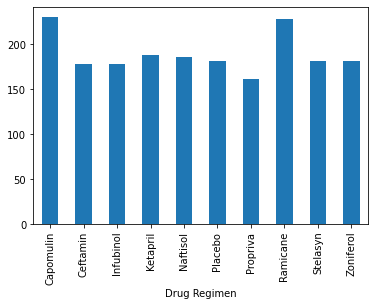

In [21]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

summary_df['Count'].plot.bar()

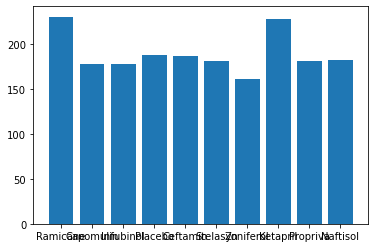

In [8]:
# Generate identical bar plot using pyplot instead of pandas.
x_values = merged_data_df["Drug Regimen"].unique()
y_values = merged_data_df.groupby(["Drug Regimen"])["Drug Regimen"].count()

x_values = x_values.tolist()
y_values = y_values.tolist()

plt.bar(x_values, y_values)
plt.show()

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [10]:
# Generate identical pie plot using pyplot



## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [12]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights